Generation 0
Generation 1
Generation 2
Generation 3
Generation 4


[22:22:26] SMILES Parse Error: extra open parentheses while parsing: CC(CN
[22:22:26] SMILES Parse Error: check for mistakes around position 3:
[22:22:26] CC(CN
[22:22:26] ~~^
[22:22:26] SMILES Parse Error: Failed parsing SMILES 'CC(CN' for input: 'CC(CN'
[22:22:26] SMILES Parse Error: unclosed ring for input: 'C1=CO'
[22:22:26] SMILES Parse Error: extra open parentheses while parsing: C(COO
[22:22:26] SMILES Parse Error: check for mistakes around position 2:
[22:22:26] C(COO
[22:22:26] ~^
[22:22:26] SMILES Parse Error: Failed parsing SMILES 'C(COO' for input: 'C(COO'
[22:22:26] SMILES Parse Error: unclosed ring for input: 'CNC=NC1'
[22:22:26] Explicit valence for atom # 2 F, 2, is greater than permitted
[22:22:26] SMILES Parse Error: extra open parentheses while parsing: C(CN
[22:22:26] SMILES Parse Error: check for mistakes around position 2:
[22:22:26] C(CN
[22:22:26] ~^
[22:22:26] SMILES Parse Error: Failed parsing SMILES 'C(CN' for input: 'C(CN'
[22:22:26] Explicit valence for ato

Generation 5
Generation 6
Generation 7
Generation 8
Generation 9


[22:22:26] SMILES Parse Error: extra close parentheses while parsing: FCC(OCN)C)O
[22:22:26] SMILES Parse Error: check for mistakes around position 10:
[22:22:26] FCC(OCN)C)O
[22:22:26] ~~~~~~~~~^
[22:22:26] SMILES Parse Error: Failed parsing SMILES 'FCC(OCN)C)O' for input: 'FCC(OCN)C)O'
[22:22:26] SMILES Parse Error: extra open parentheses while parsing: C(CC(O)NO
[22:22:27] SMILES Parse Error: check for mistakes around position 2:
[22:22:27] C(CC(O)NO
[22:22:27] ~^
[22:22:27] SMILES Parse Error: Failed parsing SMILES 'C(CC(O)NO' for input: 'C(CC(O)NO'
[22:22:27] SMILES Parse Error: extra close parentheses while parsing: O)O
[22:22:27] SMILES Parse Error: check for mistakes around position 2:
[22:22:27] O)O
[22:22:27] ~^
[22:22:27] SMILES Parse Error: Failed parsing SMILES 'O)O' for input: 'O)O'
[22:22:27] SMILES Parse Error: extra close parentheses while parsing: FCCO)NO
[22:22:27] SMILES Parse Error: check for mistakes around position 5:
[22:22:27] FCCO)NO
[22:22:27] ~~~~^
[22:22:27

Best SMILES: CNC(CN)OF
QED score: 0.4740674672223482


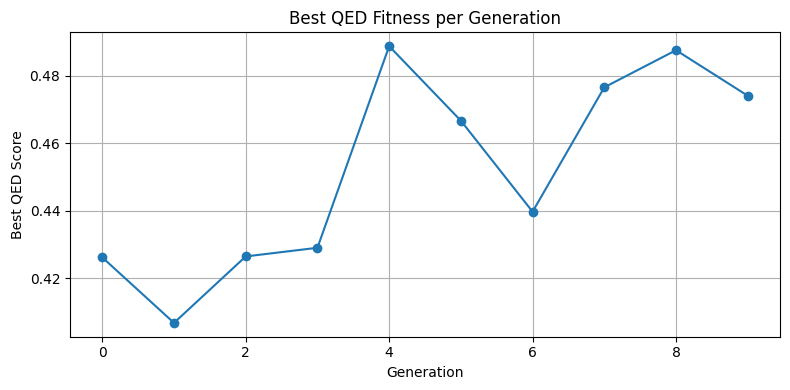

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem, QED
import random
import matplotlib.pyplot as plt

# Initial molecule pool (valid SMILES strings)
population = ["CCO", "CCC", "CCN", "C1=CC=CC=C1", "CC(C)O"]  # ethanol, propane, ethylamine, benzene, isopropanol

def fitness(smiles):
    """Calculate fitness using QED (Quantitative Estimation of Drug-likeness)."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return QED.qed(mol)
    except:
        pass
    return 0

def is_valid_smiles(smiles):
    """Check if SMILES can be parsed and is chemically valid."""
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

def mutate(smiles):
    """Random mutation: replace, insert, or delete a valid atom substring."""
    atoms = ['C', 'O', 'N', 'Cl', 'F']
    if not smiles:
        return ""
    for _ in range(5):
        pos = random.randint(0, len(smiles))
        op = random.choice(['add', 'delete', 'replace'])
        if op == 'add':
            new_smiles = smiles[:pos] + random.choice(atoms) + smiles[pos:]
        elif op == 'delete' and len(smiles) > 1:
            new_smiles = smiles[:pos] + smiles[pos+1:]
        elif op == 'replace' and len(smiles) > 0:
            if pos < len(smiles):
                new_smiles = smiles[:pos] + random.choice(atoms) + smiles[pos+1:]
            else:
                new_smiles = smiles
        else:
            continue
        if is_valid_smiles(new_smiles):
            return new_smiles
    return smiles  # fallback

def crossover(parent1, parent2):
    """Combine two SMILES strings with random cut points, robust to short parents."""
    if not parent1 or not parent2:
        return parent1 or parent2
    if len(parent1) < 2 or len(parent2) < 2:
        return parent1 if fitness(parent1) > fitness(parent2) else parent2
    cut1 = random.randint(1, len(parent1)-1)
    cut2 = random.randint(1, len(parent2)-1)
    child = parent1[:cut1] + parent2[cut2:]
    return child if is_valid_smiles(child) else parent1

def select(pop, k=5):
    """Select top-k molecules based on fitness."""
    scored = sorted(pop, key=fitness, reverse=True)
    return scored[:k]

# Genetic Algorithm with fitness tracking
generations = 10
best_fitness_per_generation = []
for gen in range(generations):
    print(f"Generation {gen}")
    new_pop = []
    selected = select(population)
    if len(selected) < 2:
        print("Warning: Not enough selected parents for crossover. Reverting to initial pool.")
        population = ["CCO", "CCC", "CCN", "C1=CC=CC=C1", "CC(C)O"]
        best_fitness_per_generation.append(0)
        continue
    while len(new_pop) < len(population):
        parent1, parent2 = random.sample(selected, 2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        if is_valid_smiles(child):
            new_pop.append(child)
    if not new_pop:
        print("Warning: New population is empty. Reverting to previous population.")
        best_fitness_per_generation.append(0)
    else:
        population = new_pop
        best = max(population, key=fitness)
        best_fitness_per_generation.append(fitness(best))

# Print best molecule
if population:
    best = max(population, key=fitness)
    print("Best SMILES:", best)
    print("QED score:", fitness(best))
else:
    print("Population is empty. Could not find the best molecule.")

# Visualize best fitness per generation
plt.figure(figsize=(8, 4))
plt.plot(best_fitness_per_generation, marker='o')
plt.title("Best QED Fitness per Generation")
plt.xlabel("Generation")
plt.ylabel("Best QED Score")
plt.grid(True)
plt.tight_layout()
plt.show()